In [2]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
matplotlib.style.use('ggplot')

In [4]:
def to_timestamp(t):
  return pd.Timestamp(datetime.fromtimestamp(t))

In [5]:
sentiment = pd.read_csv('daniel_messages_sentiment_Twitter_GLMBlender.csv')
messages = pd.read_csv('daniel_messages.csv')

In [6]:
messages['sentiment'] = sentiment['Prediction']

In [7]:
# Plot message frequency over time
events = messages.timestamp.map(to_timestamp)
event_series = pd.Series(np.ones(events.count()), events)

In [8]:
%matplotlib inline

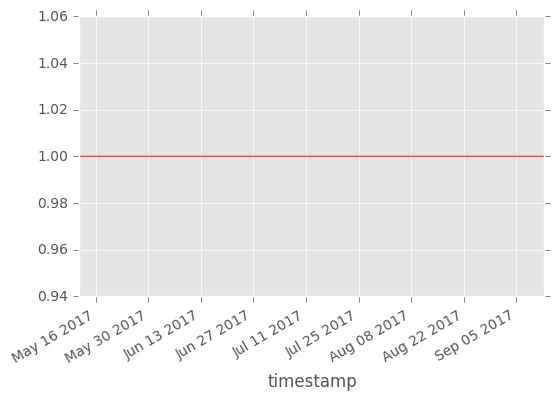

In [9]:
event_series.plot()  # plot every single event - i.e., only one count per event, so will see uniform distrib

In [10]:
month_ts = event_series.groupby([lambda t: t.year, lambda t: t.month]).sum() # by month

In [11]:
month_ts

2017  5    3343.0
      6    4838.0
      7    4323.0
      8    2887.0
      9     603.0
dtype: float64

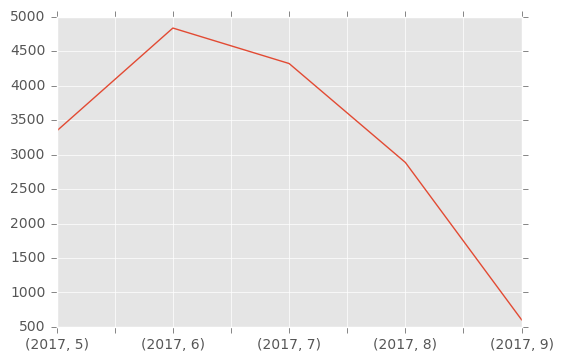

In [12]:
month_ts.plot()

In [13]:
day_ts = event_series.groupby([lambda t: t.year, lambda t: t.month, lambda t: t.day]).sum() # by day

In [14]:
day_ts

2017  5  11     72.0
         12    310.0
         15    328.0
         16    113.0
         17     97.0
         18    206.0
         19    217.0
         22    370.0
         23    374.0
         24    182.0
         25    154.0
         26     92.0
         27     44.0
         28    192.0
         30    310.0
         31    282.0
      6  1     221.0
         2     371.0
         3     230.0
         4     202.0
         5     426.0
         6     110.0
         7     225.0
         8     314.0
         9      86.0
         10    161.0
         11    394.0
         12    350.0
         13    226.0
         14    188.0
               ...  
      8  1     240.0
         2     101.0
         3     151.0
         4      88.0
         5      67.0
         6      75.0
         7     102.0
         8     198.0
         9     178.0
         11     31.0
         14    224.0
         15      1.0
         16     32.0
         17    276.0
         18      1.0
         21     11.0
         22  

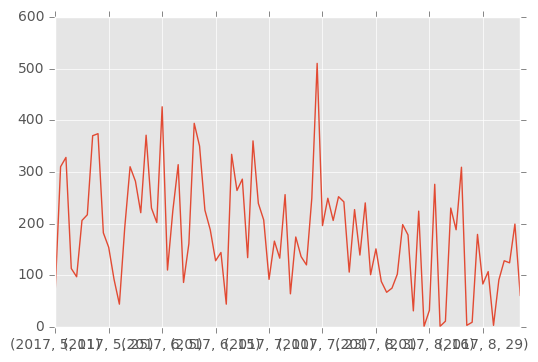

In [15]:
day_ts.plot()

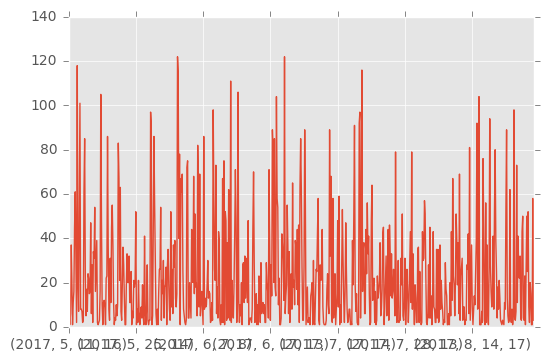

In [16]:
# by hour of day (hourly level)
hour_ts = event_series.groupby([lambda t: t.year, lambda t: t.month, lambda t: t.day, lambda t: t.hour]).sum()
hour_ts.plot()

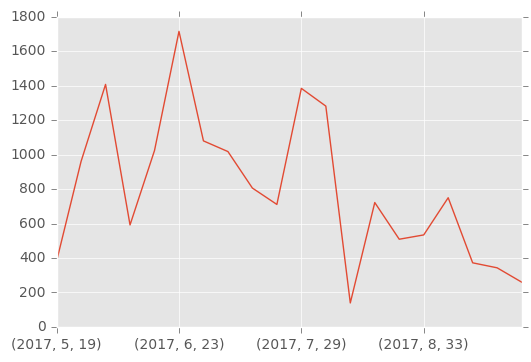

In [17]:
# by week
week_ts = event_series.groupby([lambda t: t.year, lambda t: t.month, lambda t: t.week]).sum()
week_ts.plot()

In [18]:
### Seasonality distributions 

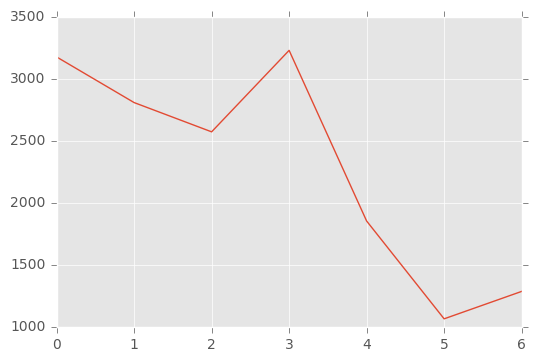

In [19]:
by_weekday = event_series.groupby([lambda t: t.weekday()]).sum()
by_weekday.plot()

# on average seem to commmunicate most in the beginning/middle of the week
# precipitous dropoff on weekends

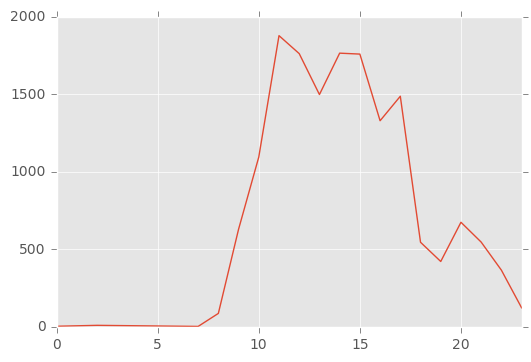

In [20]:
by_hour = event_series.groupby([lambda t: t.hour]).sum()
by_hour.plot()

# basically talk all throughout the day, dropping off in the late afternoons/evenings

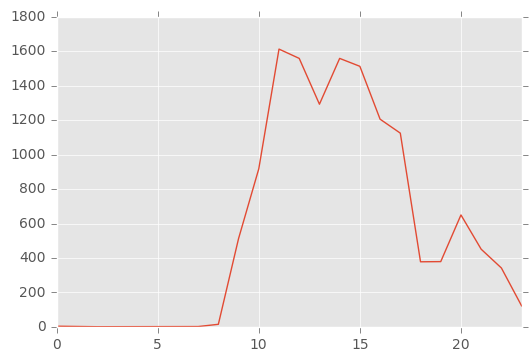

In [21]:
def is_weekday(ts):
  wd = ts.weekday()
  return wd >= 0 and wd < 5

# weekdays this event happened
workdays = filter(is_weekday, event_series.index)

# weekend days this event happened
weekends = filter(lambda e: not is_weekday(e), event_series.index)

# by hour of workday
by_workday_hour = event_series.drop(weekends).groupby([lambda t: t.hour]).sum()
by_workday_hour.plot()

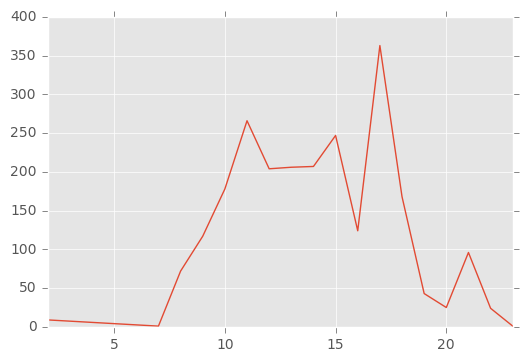

In [22]:
# by hour of weekend day
by_weekend_hour = event_series.drop(workdays).groupby([lambda t: t.hour]).sum()
by_weekend_hour.plot()

In [23]:
## Plotting sentiment

# TODO: should plot morg vs. daniel sentiment, counts for m vs. d 

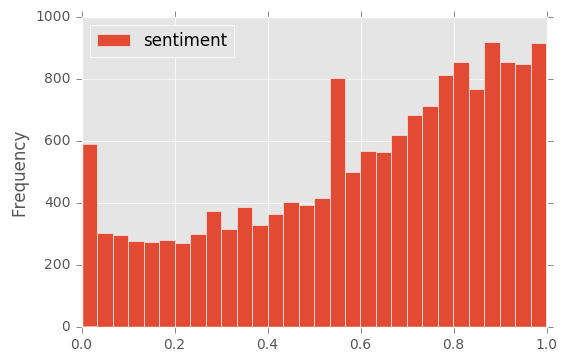

In [24]:
# sentiment distribution - we tend to be more positive
messages.plot.hist(y='sentiment', bins=30)

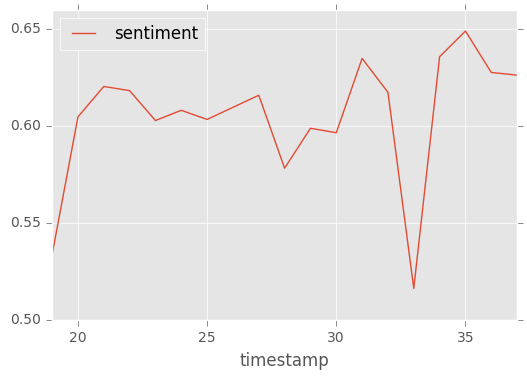

In [25]:
def to_weekly(ts):
    return to_timestamp(ts).week
    
sentiment_df = pd.DataFrame()
sentiment_df['sentiment'] = messages['sentiment']
sentiment_df['timestamp'] = messages['timestamp'].map(to_weekly)

sentiment_df.groupby(['timestamp']).mean().plot()

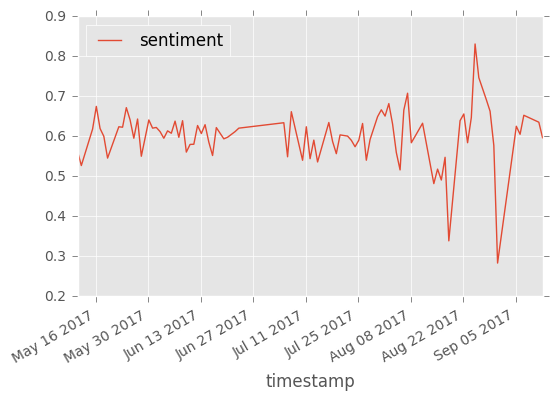

In [26]:
def to_daily(t):
    ts = to_timestamp(t)
    return pd.Timestamp(datetime(ts.year, ts.month, ts.day).timestamp() * 1000000000)


sentiment_df = pd.DataFrame()
sentiment_df['sentiment'] = messages['sentiment']
sentiment_df['timestamp'] = messages['timestamp'].map(to_daily)

sentiment_df.groupby(['timestamp']).mean().plot()

In [37]:
daily_sentiment_averages = sentiment_df.groupby(['timestamp']).mean()
daily_sentiment_averages.to_json()

'{"sentiment":{"1494475200000":0.5620074697,"1494561600000":0.5271028398,"1494820800000":0.6182049992,"1494907200000":0.6749360598,"1494993600000":0.6196068858,"1495080000000":0.6002132913,"1495166400000":0.54570792,"1495425600000":0.6240234697,"1495512000000":0.6229452667,"1495598400000":0.6718370147,"1495684800000":0.6414253889,"1495771200000":0.5953649612,"1495857600000":0.6434144521,"1495944000000":0.5503507917,"1496116800000":0.6410727368,"1496203200000":0.6206489476,"1496289600000":0.6223037592,"1496376000000":0.611952051,"1496462400000":0.5953490199,"1496548800000":0.6138108923,"1496635200000":0.607904101,"1496721600000":0.6381290833,"1496808000000":0.5977229566,"1496894400000":0.6392427308,"1496980800000":0.5607230777,"1497067200000":0.5799392278,"1497153600000":0.5803360146,"1497240000000":0.6272012754,"1497326400000":0.607112786,"1497412800000":0.6292526459,"1497499200000":0.5855558527,"1497585600000":0.5521747428,"1497672000000":0.6219745492,"1497844800000":0.5938675337,"149